In [347]:
import numpy as np
import math
import pandas as pd

### data

In [348]:
# get the total number of serving population of each clinic

df_com = pd.read_excel("community.xlsx")[["社区名称","常住人口","发热诊室"]]#["地址"]
df_com.fillna(10000, inplace = True)

clinic_name_list = ["金洲社区卫生服务站", "丽景社区卫生服务站", "中天社区卫生服务站", "水都社区卫生服务站"]
clinic_serve_pop_list = [0,0,0,0]
clinic_name_servepop_dic = dict(zip(clinic_name_list, clinic_serve_pop_list))
for i in range(0, len(df_com)):
    clinic_name_servepop_dic[(df_com.iloc[i]["发热诊室"])] += df_com.iloc[i]["常住人口"]
clinic_name_servepop_dic

{'金洲社区卫生服务站': 43750.0,
 '丽景社区卫生服务站': 70081.0,
 '中天社区卫生服务站': 56015.0,
 '水都社区卫生服务站': 68615.0}

In [349]:
com_population_list = [43750, 70081, 56015, 68615]


clinic_scale_list = [3000, 1000, 3000, 3000] # cure n people per day
clinic_scale = 8

recover_time = 7
severe_percent = 0.1
sigmoid_b = 4.6
slow_scale = 0.25

max_sim = 100
date_list = list(range(0,max_sim,1))


### basic functions

In [350]:
# multiply population
# output [0,1]
def sigmoidFunction(z, sigmoid_b, slow_scale):
    fz = []
    for num in z:
        fz.append(1/(1 + math.exp(-(num * slow_scale) + sigmoid_b)))
    return fz

In [351]:
total_severe_day_list = [[],[],[],[]]
clinic_avai_day_list = [[],[],[],[]]
total_severe_pop = [0,0,0,0]
total_severe_day_arr = np.zeros((4, len(date_list)))

#current_clinic_avai = clinic_scale_list #updated everyday

for day in date_list:
    for i in range(4):
        infected_day_arr = np.asarray(
            sigmoidFunction(date_list, sigmoid_b,
                        slow_scale)) * np.array(com_population_list[i])
        new_infected_list = np.diff(np.insert(infected_day_arr, 0, 0))

        # severe cases
        new_infected_arr = np.asarray(new_infected_list)
        new_severe_arr = new_infected_arr * severe_percent

        total_severe_pop[i] = total_severe_pop[i] + new_severe_arr[day] - clinic_scale_list[i]
        #print(total_severe_pop[i])
        total_severe_day_list[i].append(total_severe_pop[i])

        if total_severe_pop[i] > 0:
            avai_to_append = 0
        else:
            avai_to_append = total_severe_pop[i] * (-1)
        clinic_avai_day_list[i].append(avai_to_append) ###
        
        total_severe_day_arr[i, day] = np.clip(np.asarray(total_severe_day_list[i][day]),0,com_population_list[i])
        total_severe_day_list = total_severe_day_arr.tolist() 
        total_severe_pop[i] = total_severe_day_list[i][day] 

        

for i in range(4):
    df = pd.DataFrame({'total severe cases': total_severe_day_arr[i]})
    #df.plot()

<AxesSubplot: >

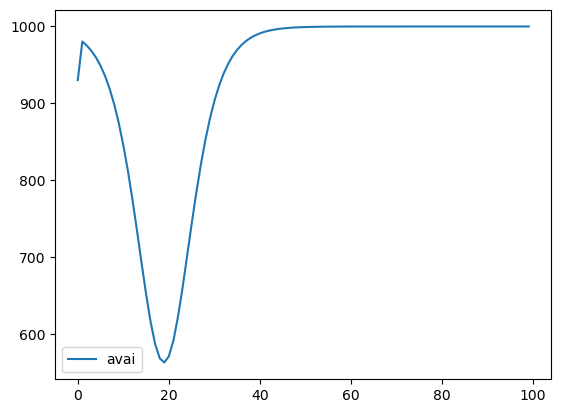

In [352]:
df = pd.DataFrame({'avai': clinic_avai_day_list[1]})
df.plot()

In [353]:
clinic_avai_day_list[0]

[2956.4608668322935,
 2987.791354262218,
 2984.424344155434,
 2980.1644274808273,
 2974.7971603704386,
 2968.0705037023836,
 2959.6971028291528,
 2949.363477547511,
 2936.7501738175984,
 2921.5678345759557,
 2903.61416169538,
 2882.8546683160193,
 2859.524359375707,
 2834.236688409936,
 2808.070838607784,
 2782.593286344992,
 2759.765091414223,
 2741.7055680254643,
 2730.3320374570435,
 2726.960481400733,
 2731.997060386927,
 2744.8377387954206,
 2764.016700212165,
 2787.5438123320305,
 2813.305749208567,
 2839.406166841356,
 2864.3729209405546,
 2887.2245258075154,
 2907.431446015279,
 2924.8213693631724,
 2939.469921943995,
 2951.602503658957,
 2961.518315928686,
 2969.5379185618426,
 2975.970760969026,
 2981.09759744395,
 2985.1629680256615,
 2988.373912614814,
 2990.9021777102193,
 2992.8881059390633,
 2994.445095758821,
 2995.6639990086724,
 2996.6171342503826,
 2997.3617829191708,
 2997.9431434684193,
 2998.396775545494,
 2998.7505920666176,
 2999.0264650805852,
 2999.24150977906

In [354]:
arr = total_severe_day_arr
arr.shape

(4, 100)

In [355]:
clinic_scale_arr = np.array(clinic_scale_list)
clinic_scale_arr.shape
#np.reshape(clinic_scale_arr,[4,1])

(4,)

In [356]:
broaded = (clinic_scale_arr - arr.T).T
broaded = np.clip(broaded,0,com_population_list[i])

broaded[3]

array([3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000.])

### old code

In [357]:
infected_day_arr = np.asarray(sigmoidFunction(date_list, sigmoid_b, slow_scale)) * pop

In [358]:
# difference
new_infected_list = [infected_day_arr[0]]
for index in range(1, len(infected_day_arr)):
    new_infected = infected_day_arr[index] - infected_day_arr[index-1]
    new_infected_list.append(new_infected)
    #print(new_infected_list)

In [359]:
# severe cases
new_infected_arr = np.asarray(new_infected_list)
new_severe_arr = new_infected_arr * severe_percent

In [360]:
# new_severe_day_list = []
# for day in date_list:
#     new_severe_day_list.append(new_severe_arr[day] - clinic_scale) ###

# new_severe_day_arr = np.clip(np.asarray(new_severe_day_list),0,pop)

total_severe_day_list = []
total_severe_pop = 0
for day in date_list:
    total_severe_pop = total_severe_pop + new_severe_arr[day] - clinic_scale
    total_severe_day_list.append(total_severe_pop)

total_severe_day_arr = np.clip(np.asarray(total_severe_day_list),0,pop)

<AxesSubplot: >

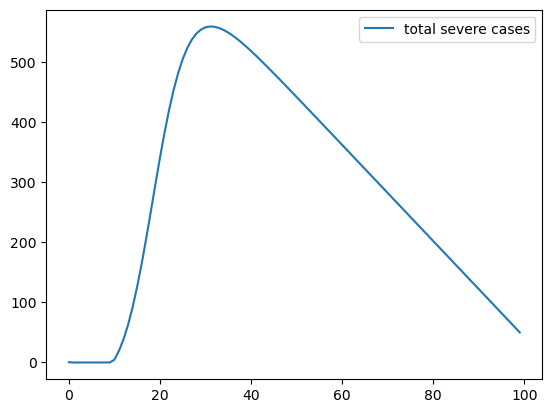

In [361]:
# total_severe_day_arr
df = pd.DataFrame({'total severe cases': total_severe_day_arr})
df.plot()